# phase 2 Collecting and Labelling data

# Importing all Required Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading data into a dataframe

In [ ]:
df = pd.read_csv('used_cars.csv')

# Getting number of Instances, Observations and Information of dataset

In [ ]:
df.shape

(4009, 12)

# We have 4009 instances and 12 Features in the dataset

# Having a glance at dataset

In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


# Here the dataset is Labeled dataset with target being - price

# Phase 3 :  Data Evaluation and Feature Engineering

# Overview of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


# Checking for duplicates in dataset

In [ ]:
df.duplicated().sum()

0

# Finding out null values in Features

In [ ]:
df.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

# Data handling
# Analyzing and preprocessing fuel_type feature

In [ ]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [ ]:
df['fuel_type'].fillna('not supported',inplace=True)

In [ ]:
df['fuel_type'].replace("–","not supported", inplace= True)

# Crosschecking changes

In [ ]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
not supported      217
Hybrid             194
E85 Flex Fuel      139
Diesel             116
Plug-In Hybrid      34
Name: count, dtype: int64

# Analyzing and preprocessing clean_title feature

In [ ]:
df['clean_title'].value_counts()

clean_title
Yes    3413
Name: count, dtype: int64

In [ ]:
df['clean_title'].fillna('no',inplace=True)

# Cross checking changes

In [ ]:
df['clean_title'].value_counts()

clean_title
Yes    3413
no      596
Name: count, dtype: int64

# Analyzing and preprocessing accident feature

In [ ]:
df['accident'].value_counts()

accident
None reported                             2910
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [ ]:
df['accident'].fillna('None reported',inplace=True)

# Cross Checking Values

In [ ]:
df['accident'].value_counts()

accident
None reported                             3023
At least 1 accident or damage reported     986
Name: count, dtype: int64

# Analyzing and preprocessing milage feature

In [ ]:
df["milage"] = df["milage"].astype(str)
df["milage"] = df["milage"].str.replace(" mi.","")
df["milage"] = df["milage"].str.replace(",","")
df["milage"] = df["milage"].astype(float)
df["milage"]

0       51000.0
1       34742.0
2       22372.0
3       88900.0
4        9835.0
         ...   
4004      714.0
4005    10900.0
4006     2116.0
4007    33000.0
4008    43000.0
Name: milage, Length: 4009, dtype: float64

# Analyzing and preprocessing price feature

In [ ]:
df['price']=df['price'].astype(str)
df['price']=df['price'].str.replace("$","")
df["price"]=df["price"].str.replace(",","")
df["price"]=df["price"].astype(float)
df['price']

0        10300.0
1        38005.0
2        54598.0
3        15500.0
4        34999.0
          ...   
4004    349950.0
4005     53900.0
4006     90998.0
4007     62999.0
4008     40000.0
Name: price, Length: 4009, dtype: float64

# Adding new feature, "Age"

In [ ]:
import datetime
cur_data = datetime.datetime.now()
df['Age'] = cur_data.year - df['model_year']

In [ ]:
df['Age'].value_counts()

Age
2     354
3     350
4     322
6     315
5     297
8     268
7     259
9     228
1     226
10    181
11    158
12    141
13    124
16    113
14    100
17     98
19     72
15     72
18     66
20     60
21     49
23     34
22     32
24     17
25     15
26     11
27      9
31      9
28      8
30      7
0       6
29      6
50      1
32      1
Name: count, dtype: int64

# Droping model_year

In [ ]:
df.drop(columns='model_year', axis=1 , inplace=True)

# Analyzing & Preprocessing the transmission feature

In [ ]:
df["transmission"].unique()

array(['6-Speed A/T', '8-Speed Automatic', 'Automatic', '7-Speed A/T',
       'F', 'A/T', '8-Speed A/T', 'Transmission w/Dual Shift Mode',
       '9-Speed Automatic', '6-Speed M/T', '10-Speed A/T', '9-Speed A/T',
       '5-Speed A/T', '1-Speed A/T', 'Automatic CVT',
       '7-Speed Automatic with Auto-Shift', 'CVT-F', 'M/T',
       '6-Speed Automatic with Auto-Shift', '10-Speed Automatic',
       'CVT Transmission', '4-Speed A/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T',
       '8-Speed Automatic with Auto-Shift', '5-Speed Automatic',
       '8-SPEED AT', '1-Speed Automatic', '5-Speed M/T', 'Manual',
       '6-Speed Manual', 'Variable', '2', '7-Speed Manual',
       'Automatic, 9-Spd 9G-Tronic', 'Automatic, 8-Spd',
       'Automatic, 8-Spd Sport w/Sport & Manual Modes', '–',
       'Auto, 6-Spd w/CmdShft', 'Transmission Overdrive Switch',
       '7-Speed Automatic', 'Automatic, 8-Spd PDK Dual-Clutch',
       'Automatic, 8-Spd M STEPTRONIC w/Drivelogic, Sport & Ma

In [ ]:
def simplify_transmission(transmission):
    if 'Automatic' in transmission:
        return 'Automatic'
    elif 'Manual' in transmission:
        return 'Manual'
    else :
        return 'Other'
df['transmission'] = df['transmission'].apply(simplify_transmission)
df['transmission'].value_counts()

transmission
Other        3279
Automatic     715
Manual         15
Name: count, dtype: int64

# Cross checking changes

In [ ]:
df["transmission"].unique()

array(['Other', 'Automatic', 'Manual'], dtype=object)

In [ ]:
df["fuel_type"].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', 'not supported', 'Diesel',
       'Plug-In Hybrid'], dtype=object)

# Analyzing & Preprocessing the engine feature & adding Horsepower & Engine_Displacement features out of it

In [ ]:
df['engine'].unique()

array(['300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capability',
       '3.8L V6 24V GDI DOHC', '3.5 Liter DOHC', ...,
       '136.0HP 1.8L 4 Cylinder Engine Gasoline Fuel',
       '270.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
       '420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel'], dtype=object)

In [ ]:
df['engine'].value_counts()

engine
2.0L I4 16V GDI DOHC Turbo                               52
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             48
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             47
–                                                        45
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    44
                                                         ..
323.0HP 6.0L 8 Cylinder Engine Gasoline Fuel              1
405.0HP 4.2L 8 Cylinder Engine Gasoline Fuel              1
353.0HP 6.0L 8 Cylinder Engine Gasoline Fuel              1
275.0HP 4.8L 8 Cylinder Engine Gasoline Fuel              1
420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel             1
Name: count, Length: 1146, dtype: int64

In [ ]:
import re

def extract_engine_att(engine_str):
    horsepower = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine_str)
    displacement = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine_str)
    return horsepower.group(1) if horsepower else '',\
           displacement.group(1) if displacement else ''


df[['Horsepower', 'Engine_Displacement']] = df['engine'].apply(extract_engine_att).apply(pd.Series)

In [ ]:
df.drop('engine',axis=1,inplace=True)

In [ ]:
df.head()

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Age,Horsepower,Engine_Displacement
0,Ford,Utility Police Interceptor Base,51000.0,E85 Flex Fuel,Other,Black,Black,At least 1 accident or damage reported,Yes,10300.0,11,300.0,3.7L
1,Hyundai,Palisade SEL,34742.0,Gasoline,Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3,None,3.8L
2,Lexus,RX 350 RX 350,22372.0,Gasoline,Automatic,Blue,Black,None reported,no,54598.0,2,None,3.5 Liter
3,INFINITI,Q50 Hybrid Sport,88900.0,Hybrid,Other,Black,Black,None reported,Yes,15500.0,9,354.0,3.5L
4,Audi,Q3 45 S line Premium Plus,9835.0,Gasoline,Automatic,Glacier White Metallic,Black,None reported,no,34999.0,3,None,2.0L


In [ ]:
df['Horsepower'].isna().sum()

707

In [ ]:
df['Horsepower'].dtype

dtype('O')

In [ ]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'])

In [ ]:
df['Horsepower'].fillna(df['Horsepower'].mean(),inplace=True)

In [ ]:
df['Horsepower'].isna().sum()

0

In [ ]:
df['Engine_Displacement'].isna().sum()

0

In [ ]:
df['Engine_Displacement'] = df['Engine_Displacement'].str.replace('L', '')

In [ ]:
df['Engine_Displacement']

0            3.7
1            3.8
2       3.5 iter
3            3.5
4            2.0
          ...   
4004         6.0
4005         3.0
4006            
4007         3.5
4008         2.0
Name: Engine_Displacement, Length: 4009, dtype: object

In [ ]:
df['Engine_Displacement'] = df['Engine_Displacement'].str.replace(' iter', '')

In [ ]:
df['Engine_Displacement'].dtype

dtype('O')

In [ ]:
df['Engine_Displacement'] = pd.to_numeric(df['Engine_Displacement'])
df['Engine_Displacement'].fillna(df['Engine_Displacement'].mean(), inplace = True)

In [ ]:
df['Engine_Displacement'].isnull().sum()

0

In [ ]:
df['model'].value_counts()

model
M3 Base                    30
F-150 XLT                  24
Corvette Base              22
1500 Laramie               18
Camaro 2SS                 17
                           ..
XE 25t                      1
MC20 Base                   1
911 Carrera 4 Cabriolet     1
488 GTB Base                1
Taycan                      1
Name: count, Length: 1898, dtype: int64

In [ ]:
df.drop("model",axis=1,inplace=True)

# Analyzing & Preprocessing the int_col & ext_col features

In [ ]:
df['ext_col'].value_counts()

ext_col
Black                       905
White                       816
Gray                        496
Silver                      374
Blue                        349
                           ... 
Anthracite Blue Metallic      1
Moonlight Cloud               1
Silver Mist                   1
Cirrus Silver Metallic        1
C / C                         1
Name: count, Length: 319, dtype: int64

In [ ]:
df['int_col'].value_counts()

int_col
Black               2025
Beige                538
Gray                 472
Brown                157
–                    133
                    ... 
Almond Beige           1
Kyalami Orange         1
Sakhir Orange          1
Tan/Ebony              1
Black / Graphite       1
Name: count, Length: 156, dtype: int64

In [ ]:
def base_color (df):
    base_colors= [
        'black', 'white', 'gray', 'silver', 'brown', 'red', 'blue', 'green',
         'orange', 'yellow']
    df['int_col'] = df['int_col'].str.lower()
    df['ext_col'] = df['ext_col'].str.lower()

    def find_color(text):
        for color in base_colors:
            if color in text :
                return color
        return 'other'

    df['int_col'] = df['int_col'].apply(find_color)
    df['ext_col'] = df['ext_col'].apply(find_color)

    return df
df= base_color(df)

In [ ]:
df['ext_col'].value_counts()

ext_col
black     1016
white      922
gray       535
silver     421
blue       395
red        311
other      218
green       80
brown       44
orange      37
yellow      30
Name: count, dtype: int64

In [ ]:
df['int_col'].value_counts()

int_col
black     2155
other      862
gray       483
brown      163
red        134
white      131
blue        32
orange      23
silver      16
green        8
yellow       2
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                4009 non-null   object 
 1   milage               4009 non-null   float64
 2   fuel_type            4009 non-null   object 
 3   transmission         4009 non-null   object 
 4   ext_col              4009 non-null   object 
 5   int_col              4009 non-null   object 
 6   accident             4009 non-null   object 
 7   clean_title          4009 non-null   object 
 8   price                4009 non-null   float64
 9   Age                  4009 non-null   int64  
 10  Horsepower           4009 non-null   float64
 11  Engine_Displacement  4009 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 376.0+ KB


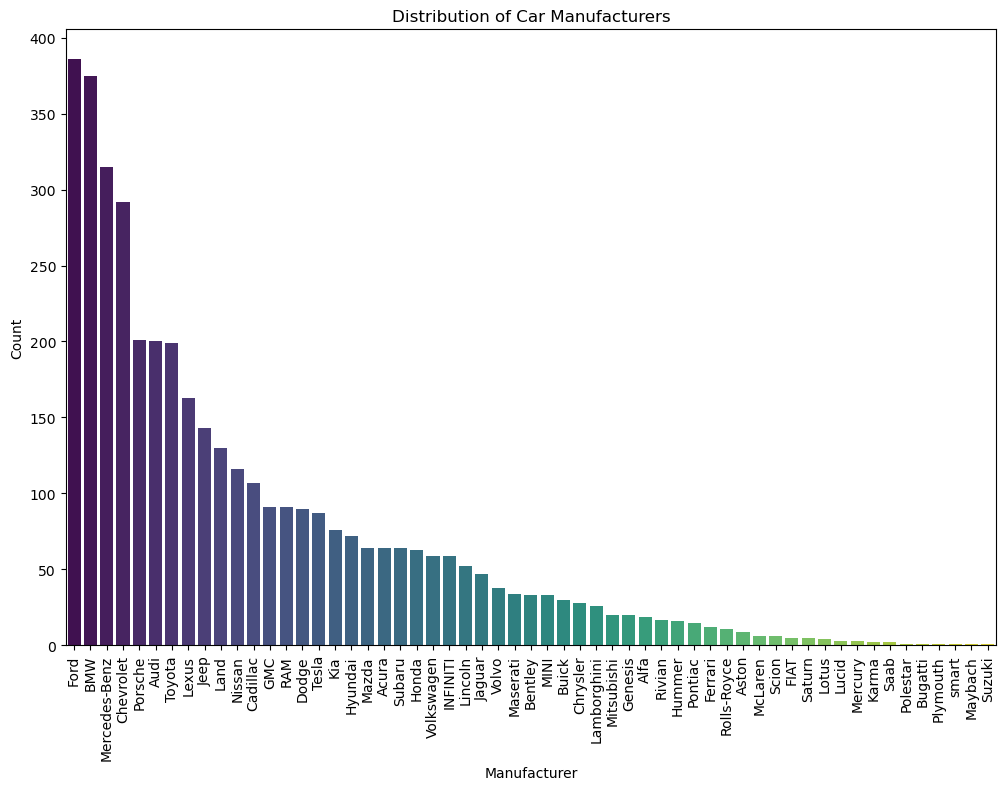

In [ ]:
brand_counts=df["brand"].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=brand_counts.index, y = brand_counts.values,palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Car Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.show()

# Handling Outliers

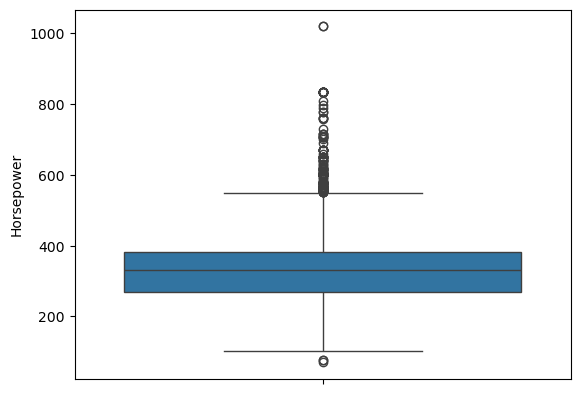

In [ ]:
sns.boxplot(df["Horsepower"])
plt.show()

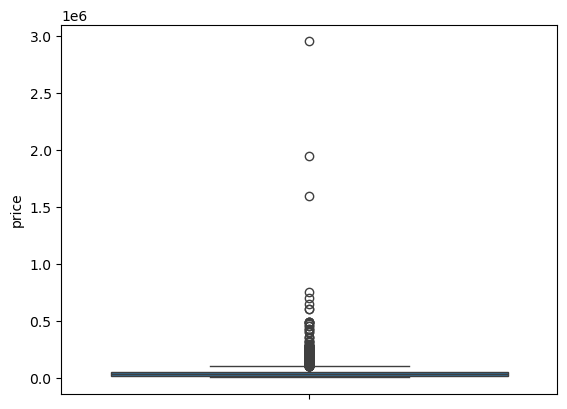

In [ ]:
sns.boxplot(df["price"])
plt.show()

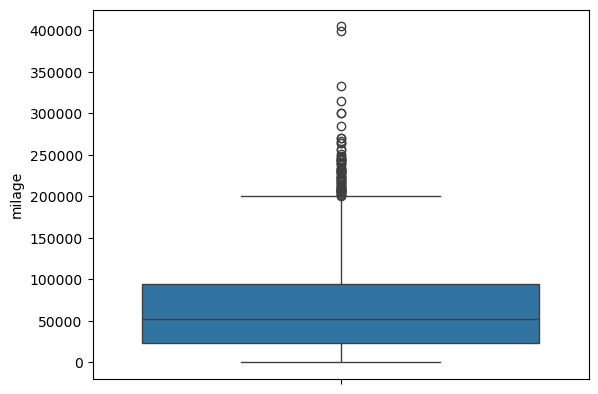

In [ ]:
sns.boxplot(df["milage"])
plt.show()

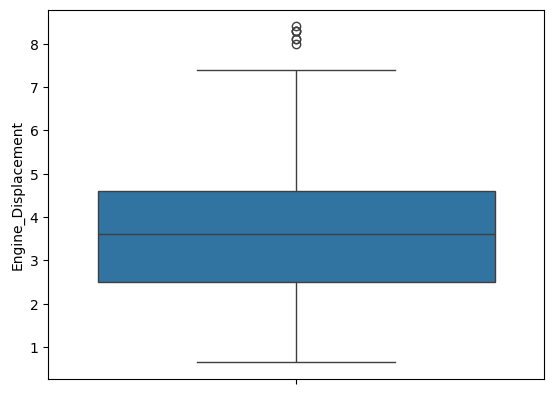

In [ ]:
sns.boxplot(df["Engine_Displacement"])
plt.show()

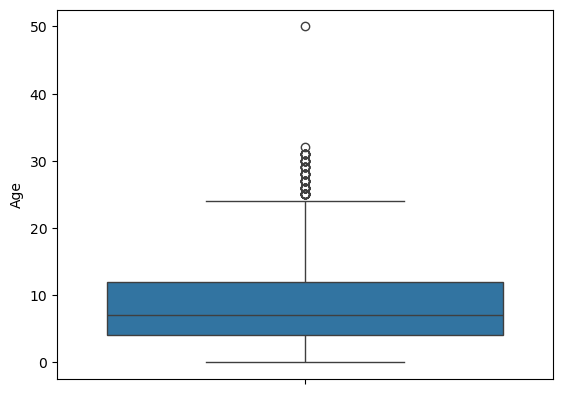

In [ ]:
sns.boxplot(df["Age"])
plt.show()

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Age'] = np.where(df['Age'] < lower_bound, lower_bound, df['Age'])
df['Age'] = np.where(df['Age'] > upper_bound, upper_bound, df['Age'])

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['price'] = np.where(df['price'] < lower_bound, lower_bound, df['price'])
df['price'] = np.where(df['price'] > upper_bound, upper_bound, df['price'])

In [ ]:
Q1 = df['milage'].quantile(0.25)
Q3 = df['milage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['milage'] = np.where(df['milage'] < lower_bound, lower_bound, df['milage'])
df['milage'] = np.where(df['milage'] > upper_bound, upper_bound, df['milage'])

In [ ]:
Q1 = df['Horsepower'].quantile(0.25)
Q3 = df['Horsepower'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Horsepower'] = np.where(df['Horsepower'] < lower_bound, lower_bound, df['Horsepower'])
df['Horsepower'] = np.where(df['Horsepower'] > upper_bound, upper_bound, df['Horsepower'])

In [ ]:
Q1 = df['Engine_Displacement'].quantile(0.25)
Q3 = df['Engine_Displacement'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Engine_Displacement'] = np.where(df['Engine_Displacement'] < lower_bound, lower_bound, df['Engine_Displacement'])
df['Engine_Displacement'] = np.where(df['Engine_Displacement'] > upper_bound, upper_bound, df['Engine_Displacement'])

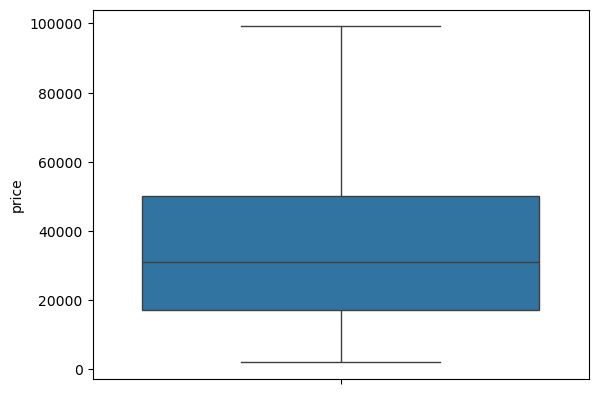

In [ ]:
sns.boxplot(df["price"])
plt.show()

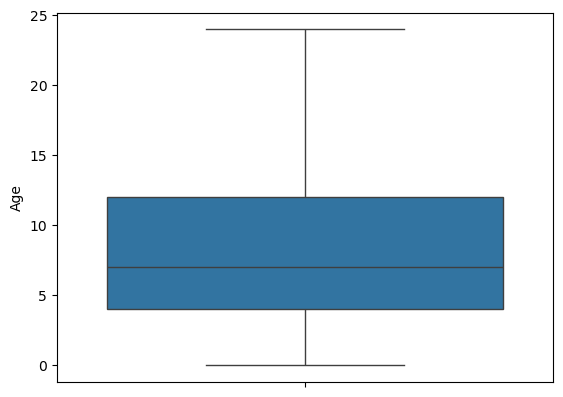

In [ ]:
sns.boxplot(df["Age"])
plt.show()

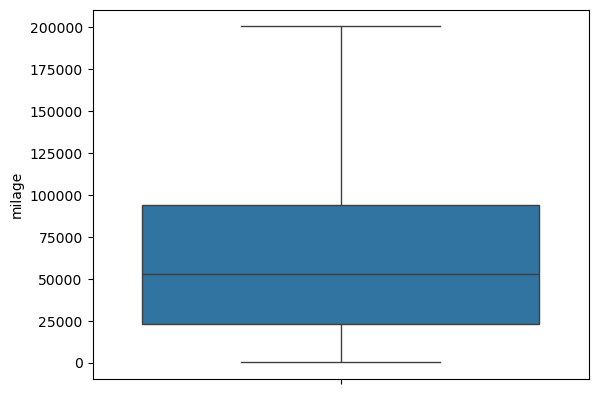

In [ ]:
sns.boxplot(df["milage"])
plt.show()

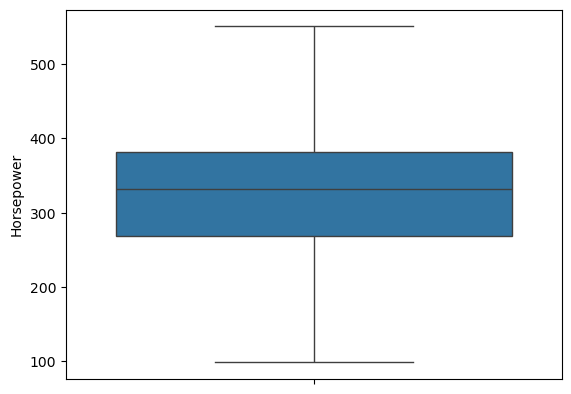

In [ ]:
sns.boxplot(df["Horsepower"])
plt.show()

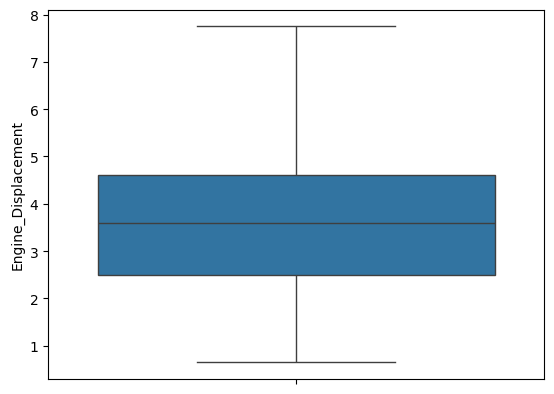

In [ ]:
sns.boxplot(df["Engine_Displacement"])
plt.show()

In [ ]:
df.corr(numeric_only=True)

,milage,price,Age,Horsepower,Engine_Displacement
milage,1.000000,-0.657797,0.638573,-0.321750,0.064927
price,-0.657797,1.000000,-0.565639,0.602324,0.261535
Age,0.638573,-0.565639,1.000000,-0.271184,0.110915
Horsepower,-0.321750,0.602324,-0.271184,1.000000,0.557892
Engine_Displacement,0.064927,0.261535,0.110915,0.557892,1.000000


# Converting Categorical to Numeric

In [ ]:
#df["transmission"] = df["transmission"].replace({'Automatic':1,
 #                                               'Manual':2,
  #                                              'Other':3})

In [ ]:
df = pd.get_dummies(df, columns=['transmission'])

In [ ]:
df.head()

,brand,milage,fuel_type,ext_col,int_col,accident,clean_title,price,Age,Horsepower,Engine_Displacement,transmission_Automatic,transmission_Manual,transmission_Other
0,Ford,51000.0,E85 Flex Fuel,black,black,At least 1 accident or damage reported,Yes,10300.0,11.0,300.000000,3.7,False,False,True
1,Hyundai,34742.0,Gasoline,other,gray,At least 1 accident or damage reported,Yes,38005.0,3.0,332.283839,3.8,True,False,False
2,Lexus,22372.0,Gasoline,blue,black,None reported,no,54598.0,2.0,332.283839,3.5,True,False,False
3,INFINITI,88900.0,Hybrid,black,black,None reported,Yes,15500.0,9.0,354.000000,3.5,False,False,True
4,Audi,9835.0,Gasoline,white,black,None reported,no,34999.0,3.0,332.283839,2.0,True,False,False


In [ ]:
df['transmission_Automatic'] = df['transmission_Automatic'].map({True: 1, False: 0})
df['transmission_Manual'] = df['transmission_Manual'].map({True: 1, False: 0})
df['transmission_Other'] = df['transmission_Other'].map({True: 1, False: 0})

In [ ]:
#df["accident"] = df["accident"].replace({'At least 1 accident or damage reported':1,"None reported":0})
df["accident"].value_counts()

accident
None reported                             3023
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['accident'])

In [ ]:
df.head()

,brand,milage,fuel_type,ext_col,int_col,clean_title,price,Age,Horsepower,Engine_Displacement,transmission_Automatic,transmission_Manual,transmission_Other,accident_At least 1 accident or damage reported,accident_None reported
0,Ford,51000.0,E85 Flex Fuel,black,black,Yes,10300.0,11.0,300.000000,3.7,0,0,1,True,False
1,Hyundai,34742.0,Gasoline,other,gray,Yes,38005.0,3.0,332.283839,3.8,1,0,0,True,False
2,Lexus,22372.0,Gasoline,blue,black,no,54598.0,2.0,332.283839,3.5,1,0,0,False,True
3,INFINITI,88900.0,Hybrid,black,black,Yes,15500.0,9.0,354.000000,3.5,0,0,1,False,True
4,Audi,9835.0,Gasoline,white,black,no,34999.0,3.0,332.283839,2.0,1,0,0,False,True


In [ ]:
df['accident_At least 1 accident or damage reported'] = df['accident_At least 1 accident or damage reported'].map({True: 1, False: 0})
df['accident_None reported'] = df['accident_None reported'].map({True: 1, False: 0})

In [ ]:
# df["clean_title"] = df["clean_title"].replace({"Yes":1,"no":0})
df["clean_title"].value_counts()

clean_title
Yes    3413
no      596
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['clean_title'])

In [ ]:
df.head()

,brand,milage,fuel_type,ext_col,int_col,price,Age,Horsepower,Engine_Displacement,transmission_Automatic,transmission_Manual,transmission_Other,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Yes,clean_title_no
0,Ford,51000.0,E85 Flex Fuel,black,black,10300.0,11.0,300.000000,3.7,0,0,1,1,0,True,False
1,Hyundai,34742.0,Gasoline,other,gray,38005.0,3.0,332.283839,3.8,1,0,0,1,0,True,False
2,Lexus,22372.0,Gasoline,blue,black,54598.0,2.0,332.283839,3.5,1,0,0,0,1,False,True
3,INFINITI,88900.0,Hybrid,black,black,15500.0,9.0,354.000000,3.5,0,0,1,0,1,True,False
4,Audi,9835.0,Gasoline,white,black,34999.0,3.0,332.283839,2.0,1,0,0,0,1,False,True


In [ ]:
df['clean_title_Yes'] = df['clean_title_Yes'].map({True: 1, False: 0})
df['clean_title_no'] = df['clean_title_no'].map({True: 1, False: 0})

In [ ]:
df.head()

,brand,milage,fuel_type,ext_col,int_col,price,Age,Horsepower,Engine_Displacement,transmission_Automatic,transmission_Manual,transmission_Other,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Yes,clean_title_no
0,Ford,51000.0,E85 Flex Fuel,black,black,10300.0,11.0,300.000000,3.7,0,0,1,1,0,1,0
1,Hyundai,34742.0,Gasoline,other,gray,38005.0,3.0,332.283839,3.8,1,0,0,1,0,1,0
2,Lexus,22372.0,Gasoline,blue,black,54598.0,2.0,332.283839,3.5,1,0,0,0,1,0,1
3,INFINITI,88900.0,Hybrid,black,black,15500.0,9.0,354.000000,3.5,0,0,1,0,1,1,0
4,Audi,9835.0,Gasoline,white,black,34999.0,3.0,332.283839,2.0,1,0,0,0,1,0,1


In [ ]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = ce.BinaryEncoder(cols=['brand'])
df_binary_encoded = encoder.fit_transform(df)

In [ ]:
le = LabelEncoder()
categorical_columns = ['fuel_type', 'ext_col', 'int_col']

for col in categorical_columns:
    df_binary_encoded[col] = le.fit_transform(df_binary_encoded[col])

In [ ]:
df_binary_encoded.head(10)

,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,milage,fuel_type,ext_col,int_col,...,Age,Horsepower,Engine_Displacement,transmission_Automatic,transmission_Manual,transmission_Other,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Yes,clean_title_no
0,0,0,0,0,0,1,51000.0,1,0,0,...,11.0,300.000000,3.700000,0,0,1,1,0,1,0
1,0,0,0,0,1,0,34742.0,2,6,3,...,3.0,332.283839,3.800000,1,0,0,1,0,1,0
2,0,0,0,0,1,1,22372.0,2,1,0,...,2.0,332.283839,3.500000,1,0,0,0,1,0,1
3,0,0,0,1,0,0,88900.0,3,0,0,...,9.0,354.000000,3.500000,0,0,1,0,1,1,0
4,0,0,0,1,0,1,9835.0,2,9,0,...,3.0,332.283839,2.000000,1,0,0,0,1,0,1
5,0,0,0,1,1,0,136397.0,2,8,6,...,8.0,332.283839,2.400000,0,0,1,0,1,0,1
6,0,0,0,1,0,1,84000.0,2,1,0,...,7.0,292.000000,2.000000,0,0,1,0,1,1,0
7,0,0,0,1,1,1,200684.0,2,4,4,...,23.0,282.000000,4.400000,0,0,1,0,1,1,0
8,0,0,0,0,1,1,23436.0,2,0,0,...,3.0,311.000000,3.500000,0,0,1,0,1,1,0
9,0,0,1,0,0,0,34000.0,5,0,0,...,4.0,534.000000,3.685693,0,0,1,0,1,1,0


# Phase 4 : Spitting dataset and standardization

# Splitting dataset into train, test % validate datasets

In [ ]:
x = df_binary_encoded.drop("price",axis=1)
y = df_binary_encoded["price"]
x.shape,y.shape

((4009, 20), (4009,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_test,x_valid,y_test,y_valid=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

# Standardizing the features using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [ ]:
x_scaled = scale.fit_transform(x_train)
x_valid_scaled = scale.transform(x_valid)
x_test_scaled = scale.transform(x_test)

In [ ]:
x_scaled = pd.DataFrame(x_scaled,columns=['brand_0', 'brand_1', 'brand_2', 'brand_3', 'brand_4', 'brand_5',
    'milage', 'fuel_type', 'ext_col', 'int_col',
    'Age', 'Horsepower', 'Engine_Displacement',
    'transmission_Automatic', 'transmission_Manual', 'transmission_Other',
    'accident_At least 1 accident or damage reported', 'accident_None reported',
    'clean_title_Yes', 'clean_title_no'])
x_scaled.head()

,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,milage,fuel_type,ext_col,int_col,Age,Horsepower,Engine_Displacement,transmission_Automatic,transmission_Manual,transmission_Other,accident_At least 1 accident or damage reported,accident_None reported,clean_title_Yes,clean_title_no
0,-0.392152,-0.676507,1.270865,1.081733,0.996443,-1.210673,-0.454240,-0.153220,-0.396156,-0.816566,-0.397949,2.247789,1.326158,-0.463945,-0.059804,0.469607,-0.565552,0.565552,0.418968,-0.418968
1,2.550034,-0.676507,-0.786866,-0.924442,-1.003570,0.825987,1.050941,-0.153220,-0.940798,1.246414,0.457455,-1.588260,-0.856435,-0.463945,-0.059804,0.469607,1.768183,-1.768183,0.418968,-0.418968
2,-0.392152,-0.676507,1.270865,-0.924442,0.996443,-1.210673,-0.774843,-0.153220,1.237770,-0.816566,1.312858,0.515215,0.453121,-0.463945,-0.059804,0.469607,1.768183,-1.768183,0.418968,-0.418968
3,-0.392152,-0.676507,1.270865,-0.924442,-1.003570,-1.210673,0.611428,3.409774,-1.213119,0.902584,-0.226868,1.917533,0.006194,-0.463945,-0.059804,0.469607,1.768183,-1.768183,0.418968,-0.418968
4,-0.392152,-0.676507,-0.786866,-0.924442,-1.003570,0.825987,-0.998995,3.409774,1.237770,-0.816566,-1.082271,1.531387,0.006194,-0.463945,-0.059804,0.469607,-0.565552,0.565552,0.418968,-0.418968


In [ ]:
x_valid_scaled = pd.DataFrame(x_valid_scaled,columns=['brand_0', 'brand_1', 'brand_2', 'brand_3', 'brand_4', 'brand_5',
    'milage', 'fuel_type', 'ext_col', 'int_col',
    'Age', 'Horsepower', 'Engine_Displacement',
    'transmission_Automatic', 'transmission_Manual', 'transmission_Other',
    'accident_At least 1 accident or damage reported', 'accident_None reported',
    'clean_title_Yes', 'clean_title_no'])
x_test_scaled = pd.DataFrame(x_test_scaled,columns=['brand_0', 'brand_1', 'brand_2', 'brand_3', 'brand_4', 'brand_5',
    'milage', 'fuel_type', 'ext_col', 'int_col',
    'Age', 'Horsepower', 'Engine_Displacement',
    'transmission_Automatic', 'transmission_Manual', 'transmission_Other',
    'accident_At least 1 accident or damage reported', 'accident_None reported',
    'clean_title_Yes', 'clean_title_no'])

# Training the data with XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model1 = XGBRegressor()
model1.fit(x_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model1.predict(x_valid_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_valid, y_pred)

0.8604481102705698

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 1, 10],  # L1 regularization
    'reg_lambda': [0, 1, 10]  # L2 regularization
}

# Initialize the model
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_scaled, y_train)

# Best Parameters and Model
print("Best Parameters:", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_

Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 10, 'reg_lambda': 1, 'subsample': 0.8}


In [ ]:
y_pred = best_xgb_model.predict(x_valid_scaled)
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_valid, y_pred)

0.8685888854629231

# Training the data with Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_scaled, y_train)

# Predict on validation set
y_pred_rf = rf_model.predict(x_valid_scaled)

In [ ]:
r2_score(y_valid, y_pred_rf)

0.8373860860856136

# Tuning the Random Forest Model using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_scaled, y_train)

# Best Parameters and Model
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
y_pred_tuned = best_rf_model.predict(x_valid_scaled)

r2_tuned = r2_score(y_valid, y_pred_tuned)

print(f" Tuned R2 Score: {r2_tuned}")


 Tuned R2 Score: 0.8439075395271401


In [ ]:
y_pred

# Out of XGBoost & Random Forest Regressors, XGBoost performed well with the accuracy of 86% for in valid dataset

# Testing model

# Hence our model XGBoost performed well will go with this

# XGBoost

In [ ]:
y_pred = best_xgb_model.predict(x_test_scaled)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8417791953836797

# Random Forest Regressor

In [ ]:
y_pred_tuned = best_rf_model.predict(x_test_scaled)

r2_tuned = r2_score(y_test, y_pred_tuned)

print(f" Tuned R2 Score: {r2_tuned}")

 Tuned R2 Score: 0.8370684108535975


# Hence our XGBoost model outperforms Random Forest Regressor